In [1]:
import numpy as np
import cv2
import scipy
from scipy import linalg
import io
import os 
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib notebook


# plt.rcParams["figure.figsize"] = (12,9)


In [2]:
path = "data"
filenames = ["3d_1.txt", "3d_2.txt"]

pointsets = []
for filename in filenames:
    file_3d = os.path.join(path,filename)
    delimiter3d = ' '

    pointset = collections.OrderedDict()
    with open(file_3d) as f3d:
        for l3d in f3d:
            l3d_split = l3d.split(delimiter3d)
            if len(l3d_split)==4:
                pointset[l3d_split[0]] = np.array([float(num) for num in l3d_split[1:]])
    pointsets.append(pointset)

In [3]:
for i, (pointset_tgt, filename) in enumerate(zip(pointsets,filenames)):
    pointset_tgt = pointset_tgt.copy()
    for j, pointset_src in enumerate(pointsets):
        if i==j:
            continue
        pointset_src = pointset_src.copy()
        p_tgt = []
        p_src = []
        for key in list(set(pointset_tgt.keys()) & set(pointset_src.keys())):
            p_tgt.append(pointset_tgt[key])
            p_src.append(pointset_src[key])
        
        p_tgt = np.array(p_tgt).astype('float32')
        p_src = np.array(p_src).astype('float32')
        p_tgt_mean = p_tgt.mean(axis=0)
        p_src_mean = p_src.mean(axis=0)
        p_tgt_ = p_tgt - p_tgt_mean
        p_src_ = p_src - p_src_mean
        H = np.dot(p_src_[:,:2].T, p_tgt_[:,:2])
        u,s,vh = np.linalg.svd(H)
        R = np.dot(vh.T, u.T)
        R = np.hstack( (np.vstack((R,np.array([0,0]))), np.array([0,0,1]).reshape(3,1)) )
        t = p_tgt_mean - np.dot(R , p_src_mean)

        for key in pointset_src.keys():
            p_src_aligned = np.dot(R , pointset_src[key].T).T + t
            if key in pointset_tgt:
                pointset_tgt[key] = np.vstack((pointset_tgt[key], p_src_aligned))
            else:
                pointset_tgt[key] = p_src_aligned

    for key in pointset_tgt.keys():
        if len(pointset_tgt[key].shape) == 2:
            pointset_tgt[key] = np.mean(pointset_tgt[key],axis=0)

    fn,ext = os.path.splitext(filename)
    file_3d = os.path.join(path,fn + "_merged" + ext)

    with open(file_3d,'w') as f3d:
        for key in pointset_tgt.keys():
            f3d.write(key + " {:.1f} {:.1f} {:.1f}".format(*pointset_tgt[key]) + os.linesep)




    

<IPython.core.display.Javascript object>


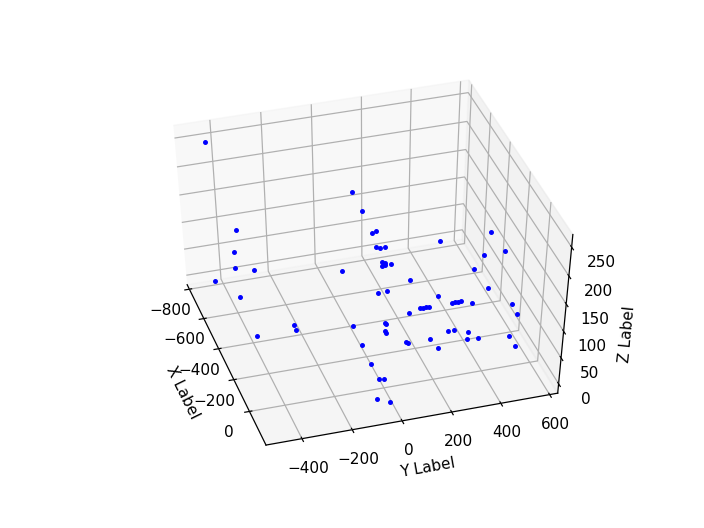

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


path = "data"
filename = "3d_1_merged.txt"
file_3d = os.path.join(path,filename)
delimiter3d = ' '

with open(file_3d) as f3d:
    for l3d in f3d:
        l3d_split = l3d.split(delimiter3d)
        if len(l3d_split)==4:
            X = [float(num) for num in l3d_split[1:]]
            ax.scatter(X[0], X[1], X[2], c='b', marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [39]:
 np.array([[0,0,0,1]])

array([[0, 0, 0, 1]])

In [30]:
R

array([[ 0.99991834, -0.01234196, -0.00328646],
       [ 0.01224281,  0.9995146 , -0.0286483 ],
       [ 0.00363845,  0.02860573,  0.99958414]], dtype=float32)

<IPython.core.display.Javascript object>


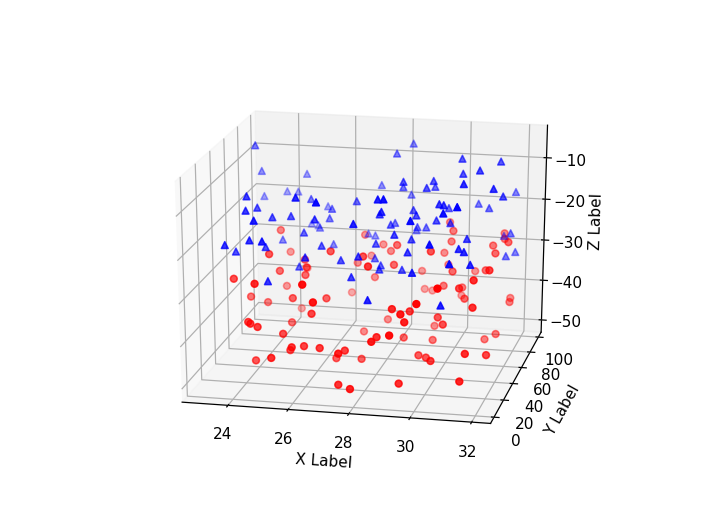

In [4]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [40]:
white_board_out1 = np.array([-31, -464, 209.4])
white_board_out2 = np.array([-31, -464, 89.8])
white_board_out3 = np.array([-277.3, -462, 90.3])
white_board_out4 = np.array([-277.3, -462, 209.9])


In [60]:
v14 = white_board_out4 - white_board_out1
v14 = v14/np.linalg.norm(v14)
v43 = white_board_out3 - white_board_out4
v43 = v43/np.linalg.norm(v43)
vd = np.cross(v14, v43)
vd = vd/np.linalg.norm(vd)

In [63]:
caution1 = white_board_out4 + 50.1*v43 + 41.7*v14 + 1.9*vd
caution2 = white_board_out4 + 79*v43 + 41.5*v14 + 1.9*vd

In [64]:
caution1

array([-319.01396719, -463.56133777,  159.8846499 ])

In [65]:
caution2

array([-318.8139742 , -463.56296175,  130.9842439 ])

In [33]:
a = [1,2,3]
b = [4,5,6]
for i, (aa,bb) in enumerate(zip(a,b)):
    print i,aa,bb

0 1 4
1 2 5
2 3 6
